In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define Sigmoid function
def sigmoid(z):
    return 1/(1+ np.exp(-z))


In [4]:
# LOSS Function : Log Likelihood
def compute_loss(y, hx):
    return -np.mean(y* np.log(hx) + (1-y) * np.log(1-hx))

In [ ]:
# Gradient of the loss
# hx = sigma(X0)
# X.T = transpose of X
def compute_graident(X, y, hx):
    return np.dot(X.T, (hx-y))/y.shape[0]

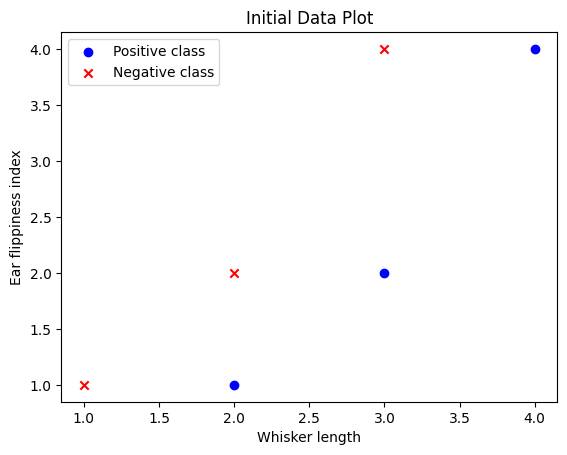

In [8]:
# Datasets
X = np.array([
    [2,1],
    [3,2],
    [4,4],
    [1,5],
    [2,6],
    [3,7]
])

y = np.array([1, 1, 1, 0, 0, 0])

plt.scatter(X[:3, 0], X[:3, 1], color='blue' , marker='o', label='Positive class')
plt.scatter(X[3:, 0], X[:3, 1], color='red' , marker='x', label='Negative class')
plt.xlabel('Whisker length')
plt.ylabel('Ear flippiness index')
plt.legend()
plt.title('Initial Data Plot')
plt.show()


In [25]:
# Logistic Regression Algorithm
def logistic_regression(X,y, learning_rate=0.01, num_iterations=10):
    #Add intercept term to X
    X = np.hstack((np.ones((X.shape[0],1))), X)

    #Initialize weights
    weights = np.zeros(X.shape[1])

    #Gradient decent
    for i in range(num_iterations):
        z = np.dot(X, weights)
        hx = sigmoid(z)
        loss = compute_loss(y, hx)
        gradient = compute_graident(X, y, hx)
        weights -= learning_rate * gradient
        
        plot_decision_boundary(X,y,weights, loss, i)
        print(f'Iteration {i} : Thets={weights}, Loss={loss}')
    
    return weights


In [27]:
# Plotting function for decision boundary
def plot_decision_boundary(X,y, weights, loss, iteration):
    plt.scatter(X[:3, 0], X[:3, 1], color='blue' , marker='o', label='Positive class' if iteration == 0 else " ")
    plt.scatter(X[3:, 0], X[:3, 1], color='red' , marker='x', label='Negative class' if iteration == 0 else " " )

    # Extend the x values a bit beyond the minimum and maximum values of the dataset
    x_values = np.array([np.min(X[:,1]) - 1, np.max(X[:, 1]) + 1])
    y_values = -(weights[0] + weights[1] * x_values / weights[2])
    plt.plot(x_values, y_values, "k")

    plt.xlim(x_values[0], x_values[1])
    plt.ylim(np.min(x[:, 2]) - 1, np.max(X[:, 2])+ 1)
    plt.xlabel('Whisker length')
    plt.ylabel('Ear flippiness index')

    plt.title('Initial Data Plot')
    if iteration == 0:
        plt.legend()
    plt.show()

In [30]:
weights = logistic_regression(X,y)

TypeError: hstack() takes 1 positional argument but 2 were given